#### 문제 1. 다음과 관련된 4개의 패키지를 사용 가능하도록 구현하세요
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ 다차원 배열 처리, 표 형태의 데이터 처리, 데이터 시각화 처리, json 데이터 처리 ]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

#### 문제 2. json 데이터 처리 패키지를 사용해서 data-files/example.txt 파일의 데이터를 읽고 Dictionary의 List 형식의 변수에 저장하고 2건의 데이터를 출력하세요
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(변수 이름을 records로 만드세요)

In [2]:
path = 'data-files/example.txt'
# path
records = [json.loads(line) for line in open(path,encoding='utf-8')]
records[:2]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]}]

#### 문제 3. List 형식의 변수인 records를 순회하면서 각 Dictionary 요소에서 Key가 'tz'인 항목의 값을 읽어서 리스트 변수에 저장하고 10개까지 출력하세요
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(변수 이름을 time_zones로 만드세요)

In [3]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

#### 문제 4. 문제 3의 time_zones 변수에 포함된 각 값의 갯수를 { 타임존 : 갯수 }의 Dictionary 형식으로 만드는 함수를 구현하세요
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(함수 이름을 get_counts로 만드세요)

In [17]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] +=1
        else:
            counts[x] = 1
    return counts


#### 위 함수는 아래와 같이  구현할 수 있습니다.

In [18]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

#### 문제 4에서 만든 함수를 호출해서 결과를 counts 변수에 저장하세요

In [19]:
counts = get_counts(time_zones)
print( len(counts), len(time_zones) ) # (중복되지 않는 타임존 갯수, 모든 데이터의 갯수)

97 3440


#### 위에서 만든 counts 변수에 저장된 데이터 중 'America/New_York' 타임존의 갯수를 출력하세요

In [20]:
counts['America/New_York']

1251

#### 위 작업은 다음과 같은 방법으로도 구현할 수 있습니다.

In [21]:
counts2 = np.unique(time_zones, return_counts=True)
counts2 = { tz: cnt for tz, cnt in zip(counts2[0], counts2[1]) }
print( len( counts2.keys() ), len( time_zones ) )
print( counts2["America/New_York"] )

97 3440
1251


#### 문제 5. 위에서 만든 counts 변수에 저장된 데이터를 값(갯수)를 기준으로 내림차순 정렬하고 상위 n개(default 10)의 데이터를 반환하는 함수를 구현하세요
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(함수의 형식을 top_counts(count_dict, n=10))

In [22]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]





#### 위에서 만든 top_counts 함수를 사용해서 상위 10개의 데이터를 출력하세요

In [23]:
def top_counts(count_dict, n=10):
    value_key_pairs = [ (count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

#### 위 top_counts 함수는 Counter 모듈을 사용해서 다음과 같이 구현할 수 있습니다.

In [24]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

#### 문제 6. records 데이터를 사용해서 pandas DataFrame을 만들고 info() 함수를 호출해서 구조를 확인하세요
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;( 변수 이름을 frame으로 만드세요 )

In [25]:
import pandas as pd
frame = pd.DataFrame(records)
frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

#### frame DataFrame에서 처음 10개의 데이터를 출력하세요

In [26]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

#### 문제 7. 위의 frame 변수의 value_counts 함수를 호출해서 반환된 타임존-갯수 Series를 tz_counts 변수에 저장하고 상위 10개를 출력하세요 

In [27]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

#### 위의 출력을 보면 타임존의 이름이 비어 있는 경우가 있습니다. frame 변수에 저장되어 있는 DataFrame에서 tz 컬럼의 NaN 값의 갯수와 ''값의 갯수를 출력하세요

In [28]:
'[NaN : {0}][Empty Value : {1}][Total : {2}]'.format(frame['tz'].isna().sum(), (frame['tz'] == '').sum(), frame['tz'].count())

'[NaN : 120][Empty Value : 521][Total : 3440]'

#### 문제 8. frame 변수에 저장되어 있는 DataFrame에서 타임존('tz') 컬럼의 값이 NaN인 경우 'Missing'으로, ''인 경우 'Unknown'으로 변경해서 변수에 저장하세요
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (변수 이름을 clean_tz으로 만드세요)

In [29]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()

#### 위에서 만든 clean_tz 변수의 value_counts 함수를 호출해서 반환된 타임존:갯수 Series를 변수에 저장하고 갯수가 많은 상위 10개의 데이터를 출력하세요
#### (변수 이름을 tz_counts로 만드세요)

In [30]:
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

#### 확장 시각화 패키지인 seaborn을 임포트하세요

In [31]:
import seaborn as sns

#### 문제 9. 시각화 그래프 출력 크기를 10,4로 설정하고 tz_counts에 저장된 데이터 중 처음 10개의 데이터를 seaborn 패키지를 사용해서 막대그래프(barplot)로 출력하세요

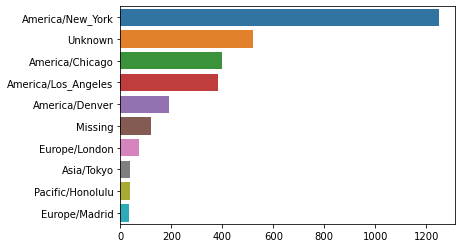

In [32]:
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)





#### frame 변수에 저장된 DataFrame의 'a' 컬럼은 'agent'를 의미합니다. 50번째 데이터의 agent를 출력해서 확인하세요

In [33]:
frame['a'][1]
frame['a'][50]
# frame['a'][51][:50]  # long line

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

#### 문제 10. frame 변수에 저장된 DataFrame의 'a' 컬럼의 값이 너무 깁니다.
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;frame 변수의 'a' 컬럼의 첫번째 공백 이전의 부분 문자열을 추출해서 Series 형식의 변수에 저장하세요
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;예) 'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2' -> 'Mozilla/5.0'
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (변수 이름을 results로 만드세요)

In [34]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

#### results 변수에 저장된 처음 5개의 데이터를 출력하세요

In [35]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

#### results 변수에 저장된 데이터에서 agent별로 갯수를 계산하고 상위 8개의 데이터를 출럭하세요 (value_counts 함수 사용)

In [36]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

#### frame 변수에 저장된 DataFrame에서 'a' 컬럼의 값이 NaN이 아닌 데이터만 추출해서 변수에 저장하세요
#### (변수 이름을 cframe으로 만드세요)

In [37]:
cframe = frame[frame.a.notnull()]

#### 위에서 만든 cframe은 원본을 참조합니다. 원본과 다른 복사본을 만드세요

In [38]:
cframe = cframe.copy()

#### cframe 변수에 저장된 DataFrame에 'os'라는 새 컬럼을 만들고,
#### 'a'컬럼의 값에 'Windows' 문자열 포함 여부에 따라 'Windows' 또는 'Not Windows'로 저장하세요

In [39]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

#### cframe 변수의 os 컬럼 데이터 중 처음 5개의 데이터를 출력하세요

In [40]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

#### cframe 변수에 저장된 DataFrame을 'tz'컬럼과 'os' 컬럼 기준으로 grouping 하고 변수에 저장하세요 (groupby 함수 사용) 
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (변수 이름을 by_tz_os로 만드세요)

In [41]:
by_tz_os = cframe.groupby(['tz', 'os'])

#### by_tz_os 변수를 사용해서 'tz', 'os' 그룹별 갯수를 계산하세요 (size 함수 사용)

In [42]:
by_tz_os.size()

tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

#### by_tz_os 변수를 사용해서 'tz'을 인덱스로 'os'의 각 값을 컬럼으로 하는 DataFrame을 만들고 변수에 저장하세요 (이 때 값이 없는 경우 0으로 채우세요)
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (변수 이름을 agg_counts로 만드세요)

In [43]:
agg_counts = by_tz_os.size().unstack().fillna(0)

#### agg_counts 변수의 상위 10개의 데이터를 출럭하세요

In [44]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


#### agg_counts를 행방향 합(Windows + Not Windows)을 계산하고 인덱스기준('tz')으로 정렬한 후 'tz' - 순위 형식의 Series를 만들어서 변수에 저장하세요
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (변수 이름을 indexer로 만드세요)

In [45]:
# Use to sort in ascending order
indexer = agg_counts.sum(axis=1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

#### 위에서 계산된 indexer를 사용해서 상위 10개 (마지막 10개) 데이터를 뽑아서 변수에 저장하세요
#### (변수 이름을 count_subset으로 만드세요)

In [46]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


#### 위의 순위 구현은 다음과 같은 방법으로도 구현할 수 있습니다.

In [47]:
agg_counts.sum(axis=1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

#### count_subset DataFrame을 출력하세요

In [48]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


#### count_subset의 컬럼을 인덱스로 변경하고 컬럼의 이름은 'total'로 변경한 후 인덱스를 일반 컬럼으로 변경하세요

In [49]:
# Rearrange the data for plotting
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


#### count_subset의 데이터를 seaborn 패키지의 수평 막대그래프로 출력하세요 (x : 'total', y : 'tz', hue : 'os')

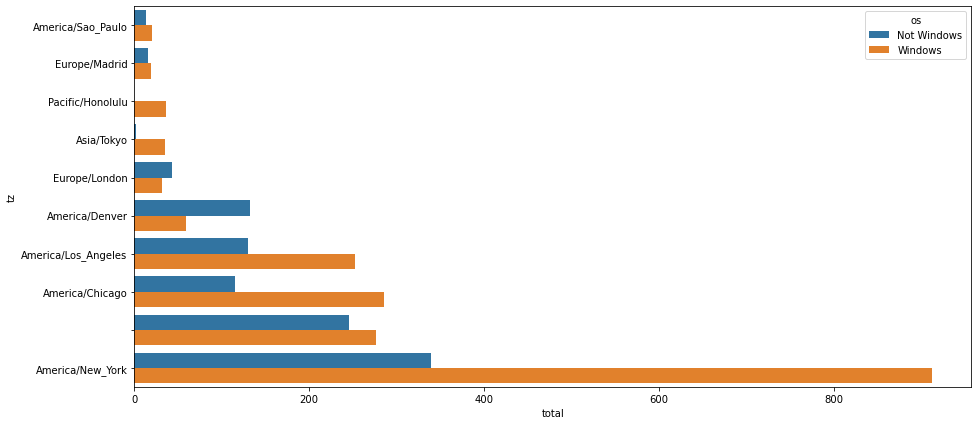

In [50]:
plt.figure(figsize=(15, 7))
sns.barplot(x='total', y='tz', hue='os',  data=count_subset)
plt.show()

#### 각 행의 총합을 1로 만드는 정규화 함수를 구현하세요
#### (함수 이름을 norm_total로 만드세요)

In [51]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

#### count_subset을 'tz' 컬럼으로 grouping하고 위에서 만든 norm_total 함수를 적용한 결과를 변수에 저장하세요
#### (변수 이름을 results로 만드세요)

In [52]:
results = count_subset.groupby('tz').apply(norm_total)

#### results 변수를 seaborn 패키지의 막대그래프로 출력하세요 (barplot 함수 사용)

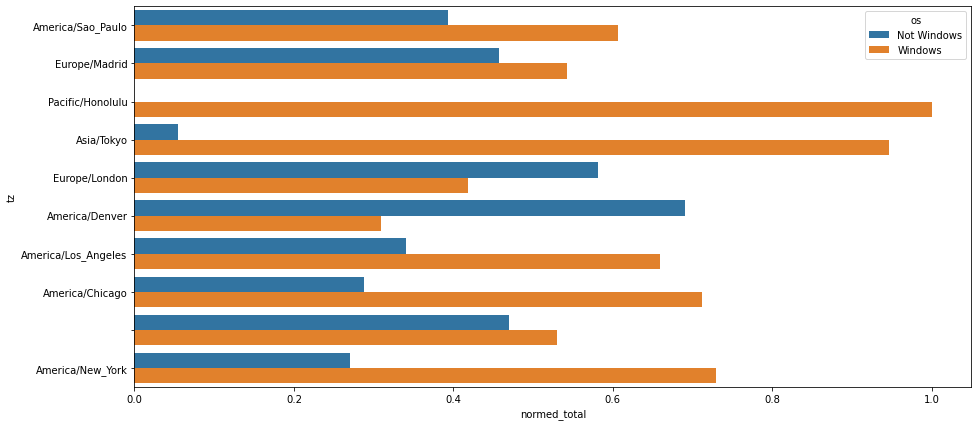

In [53]:
plt.figure(figsize=(15, 7))
sns.barplot(x='normed_total', y='tz', hue='os',  data=results)
plt.show()